In [16]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv(r"/content/drive/MyDrive/Data sets/Churn_Modelling.csv")
rows, cols = data.shape
print(f'There are {rows} and {cols} columns')

There are 10000 and 14 columns


In [18]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [20]:
# Splitting dependaent and independent
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [21]:
# Creating dummy variables
Geography	= pd.get_dummies(X['Geography'],drop_first = True)
Gender = pd.get_dummies(X['Gender'], drop_first = True)

In [22]:
# Droping the existing variable
X = X.drop(['Geography','Gender'],axis = 1)

In [23]:
# Concating dummy variable
X = pd.concat([X,Geography, Gender],axis = 1)

In [24]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [25]:
#  Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [26]:
 # Feature Scaling
 from sklearn.preprocessing import StandardScaler
 sc = StandardScaler()
 X_train = sc.fit_transform(X_train)
 X_test = sc.transform(X_test)


In [27]:
# Importing Keras and package
import keras
from keras.models import Sequential
# to initialise  architeure ANN ,CNN, RNN we have to import sequential.
from keras.layers import Dense
# Input layer , hidden layer , output layer that layers are built with this dense.


In [34]:
# Intialise the ANN
classifier = Sequential()

# Creating input layer
classifier.add(Dense(units= 10, kernel_initializer = 'he_uniform', activation ='relu',input_dim = 11))

# Creating first hidden layer
classifier.add(Dense(units= 8, kernel_initializer = 'he_uniform', activation ='relu'))

# Creating secont hidden layer
classifier.add(Dense(units= 6, kernel_initializer = 'he_normal', activation ='relu'))

#Creating output layer
classifier.add(Dense(units= 1, kernel_initializer = 'glorot_uniform', activation ='sigmoid',input_dim = 11))

# Copiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

# Fitting to the data
model_history = classifier.fit(X_train, y_train, validation_split = 0.3,batch_size = 10,epochs = 100)

Epoch 1/100
560/560 [==============================] - 4s 5ms/step - loss: 0.5661 - accuracy: 0.7723 - val_loss: 0.5112 - val_accuracy: 0.7908
Epoch 2/100
560/560 [==============================] - 2s 4ms/step - loss: 0.4733 - accuracy: 0.7980 - val_loss: 0.4550 - val_accuracy: 0.8054
Epoch 3/100
560/560 [==============================] - 2s 4ms/step - loss: 0.4344 - accuracy: 0.8161 - val_loss: 0.4284 - val_accuracy: 0.8208
Epoch 4/100
560/560 [==============================] - 2s 4ms/step - loss: 0.4179 - accuracy: 0.8245 - val_loss: 0.4225 - val_accuracy: 0.8242
Epoch 5/100
560/560 [==============================] - 2s 4ms/step - loss: 0.4101 - accuracy: 0.8291 - val_loss: 0.4192 - val_accuracy: 0.8263
Epoch 6/100
560/560 [==============================] - 2s 4ms/step - loss: 0.4033 - accuracy: 0.8314 - val_loss: 0.4136 - val_accuracy: 0.8317
Epoch 7/100
560/560 [==============================] - 3s 5ms/step - loss: 0.3972 - accuracy: 0.8368 - val_loss: 0.4142 - val_accuracy: 0.8283

In [35]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 6)                 54        
                                                                 
 dense_6 (Dense)             (None, 1)                 7         
                                                                 
Total params: 269 (1.05 KB)
Trainable params: 269 (1.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


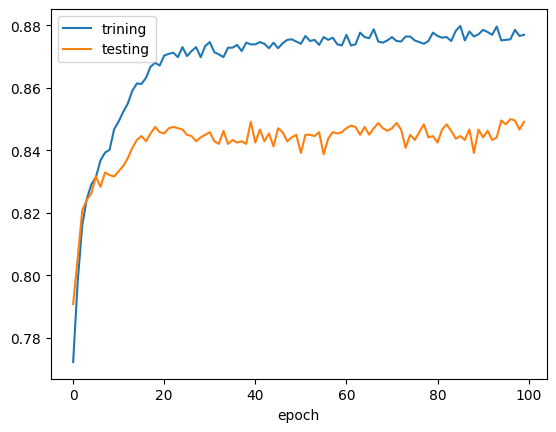

In [36]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('accuracy')
plt.xlabel('epoch')
plt.legend(['trining','testing'])
plt.show()

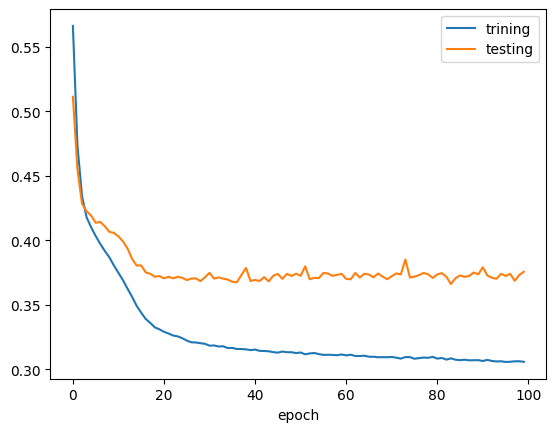

In [37]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('loss')
plt.xlabel('epoch')
plt.legend(['trining','testing'])
plt.show()

In [38]:
# predicting the results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)


63/63 [==============================] - 0s 2ms/step
[[1516   91]
 [ 194  199]]
0.8575
